<a href="https://colab.research.google.com/github/Alidon256/Rainfall-Prediction-in-Ugand/blob/main/Rainfall_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



--- Implementing Random Forest Regressor ---
Random Forest Regressor trained successfully.

Random Forest Regressor MAE: 0.59 mm
Random Forest Regressor RMSE: 3.03 mm


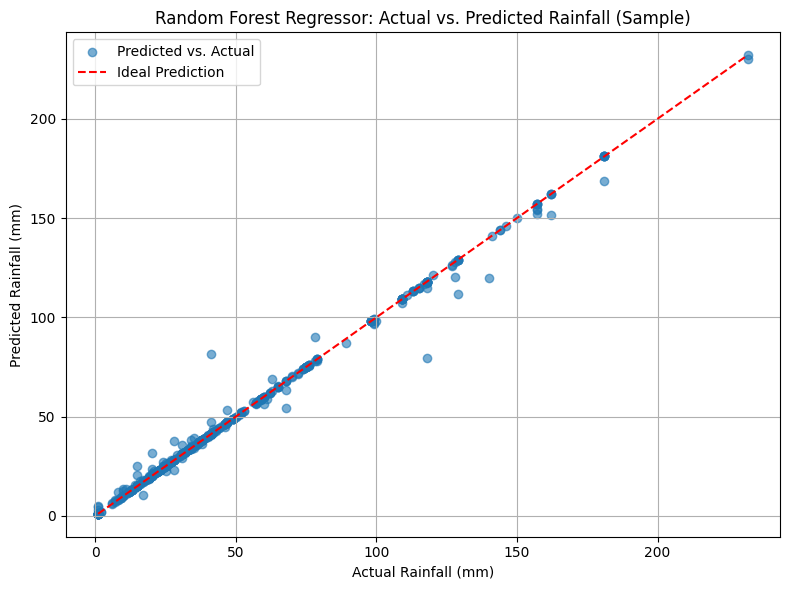

In [ ]:
from sklearn.ensemble import RandomForestRegressor

print("\n--- Implementing Random Forest Regressor ---")

# 2. Instantiate a RandomForestRegressor model with random_state=42.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 for parallel processing

# 3. Train the model using the scaled training data X_train and y_train.
# RandomForestRegressor expects a 1D array for y_train, so we flatten it.
rf_model.fit(X_train, y_train.ravel())
print("Random Forest Regressor trained successfully.")

# 4. Make predictions on the scaled test data X_test.
y_pred_rf_scaled = rf_model.predict(X_test)

# 5. Inverse transform the predictions and the actual test values (y_test) back to their original scale.
y_pred_rf_original = target_scaler.inverse_transform(y_pred_rf_scaled.reshape(-1, 1))
y_test_rf_original = target_scaler.inverse_transform(y_test)

# 6. Calculate the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).
mae_rf = mean_absolute_error(y_test_rf_original, y_pred_rf_original)
mse_rf = mean_squared_error(y_test_rf_original, y_pred_rf_original)
rmse_rf = np.sqrt(mse_rf)

# 7. Print the calculated MAE and RMSE.
print(f"\nRandom Forest Regressor MAE: {mae_rf:.2f} mm")
print(f"Random Forest Regressor RMSE: {rmse_rf:.2f} mm")

# 8. Create a scatter plot to visualize the actual vs. predicted rainfall for the Random Forest Regressor.
plt.figure(figsize=(8, 6)) # New figure for the scatter plot
sample_size = 500
plt.scatter(y_test_rf_original[:sample_size], y_pred_rf_original[:sample_size], alpha=0.6, label='Predicted vs. Actual')
plt.plot([y_test_rf_original.min(), y_test_rf_original.max()],
         [y_test_rf_original.min(), y_test_rf_original.max()],
         'r--', label='Ideal Prediction') # Line for ideal prediction
plt.title('Random Forest Regressor: Actual vs. Predicted Rainfall (Sample)')
plt.xlabel('Actual Rainfall (mm)')
plt.ylabel('Predicted Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


--- Model Performance Comparison ---
Neural Network MAE: 25.34 mm
Neural Network RMSE: 34.64 mm
Random Forest Regressor MAE: 0.59 mm
Random Forest Regressor RMSE: 3.03 mm


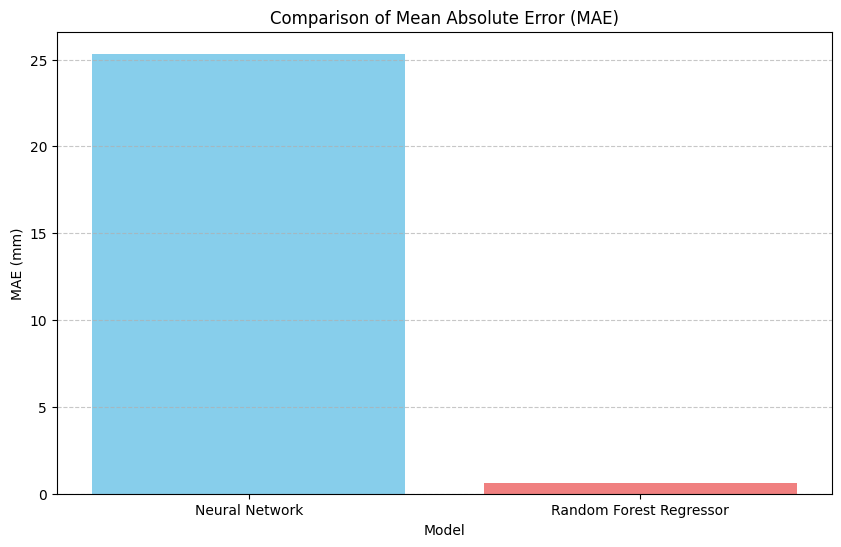

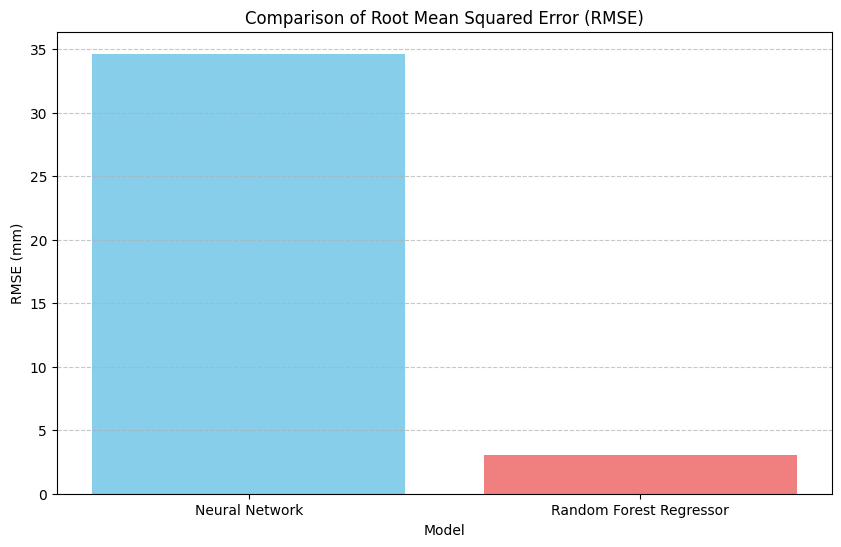

In [ ]:
print("\n--- Model Performance Comparison ---")
print(f"Neural Network MAE: {mae:.2f} mm")
print(f"Neural Network RMSE: {rmse:.2f} mm")
print(f"Random Forest Regressor MAE: {mae_rf:.2f} mm")
print(f"Random Forest Regressor RMSE: {rmse_rf:.2f} mm")

# Prepare data for plotting
models = ['Neural Network', 'Random Forest Regressor']
mae_values = [mae, mae_rf]
rmse_values = [rmse, rmse_rf]

# Create a bar chart for MAE comparison
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color=['skyblue', 'lightcoral'])
plt.title('Comparison of Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.ylabel('MAE (mm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Create a bar chart for RMSE comparison
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['skyblue', 'lightcoral'])
plt.title('Comparison of Root Mean Squared Error (RMSE)')
plt.xlabel('Model')
plt.ylabel('RMSE (mm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


--- Implementing K-Nearest Neighbors Regressor ---
K-Nearest Neighbors Regressor trained successfully.

K-Nearest Neighbors Regressor MAE: 26.03 mm
K-Nearest Neighbors Regressor RMSE: 36.26 mm


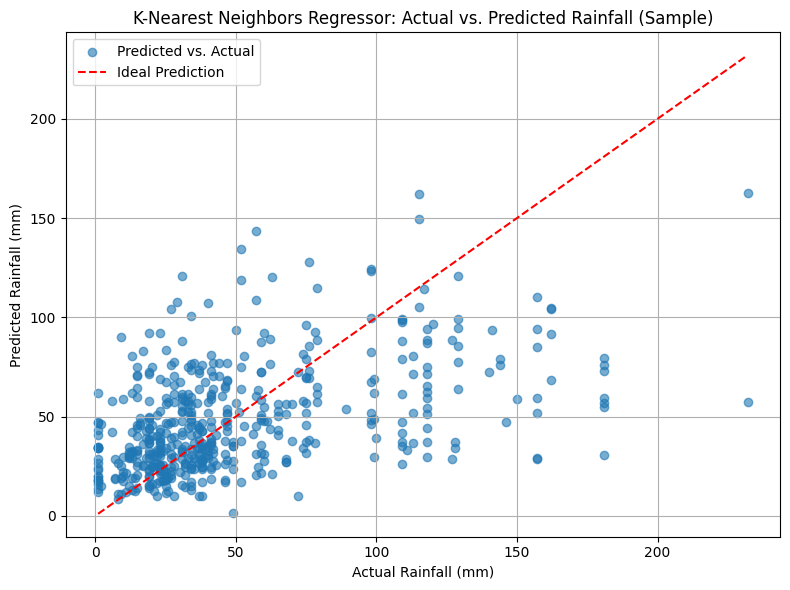

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

print("\n--- Implementing K-Nearest Neighbors Regressor ---")

# 2. Instantiate a KNeighborsRegressor model with n_neighbors=5 and n_jobs=-1.
knn_model = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)

# 3. Train the model using the scaled training data X_train and y_train.
# KNeighborsRegressor expects a 1D array for y_train, so we flatten it.
knn_model.fit(X_train, y_train.ravel())
print("K-Nearest Neighbors Regressor trained successfully.")

# 4. Make predictions on the scaled test data X_test.
y_pred_knn_scaled = knn_model.predict(X_test)

# 5. Inverse transform the predictions and the actual test values (y_test) back to their original scale.
y_pred_knn_original = target_scaler.inverse_transform(y_pred_knn_scaled.reshape(-1, 1))
y_test_knn_original = target_scaler.inverse_transform(y_test)

# 6. Calculate the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).
mae_knn = mean_absolute_error(y_test_knn_original, y_pred_knn_original)
mse_knn = mean_squared_error(y_test_knn_original, y_pred_knn_original)
rmse_knn = np.sqrt(mse_knn)

# 7. Print the calculated MAE and RMSE.
print(f"\nK-Nearest Neighbors Regressor MAE: {mae_knn:.2f} mm")
print(f"K-Nearest Neighbors Regressor RMSE: {rmse_knn:.2f} mm")

# 8. Create a scatter plot to visualize the actual vs. predicted rainfall for the KNN Regressor.
plt.figure(figsize=(8, 6)) # New figure for the scatter plot
sample_size = 500
plt.scatter(y_test_knn_original[:sample_size], y_pred_knn_original[:sample_size], alpha=0.6, label='Predicted vs. Actual')
plt.plot([y_test_knn_original.min(), y_test_knn_original.max()],
         [y_test_knn_original.min(), y_test_knn_original.max()],
         'r--', label='Ideal Prediction') # Line for ideal prediction
plt.title('K-Nearest Neighbors Regressor: Actual vs. Predicted Rainfall (Sample)')
plt.xlabel('Actual Rainfall (mm)')
plt.ylabel('Predicted Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


--- Implementing Decision Tree Regressor ---
Decision Tree Regressor trained successfully.

Decision Tree Regressor MAE: 0.43 mm
Decision Tree Regressor RMSE: 5.41 mm


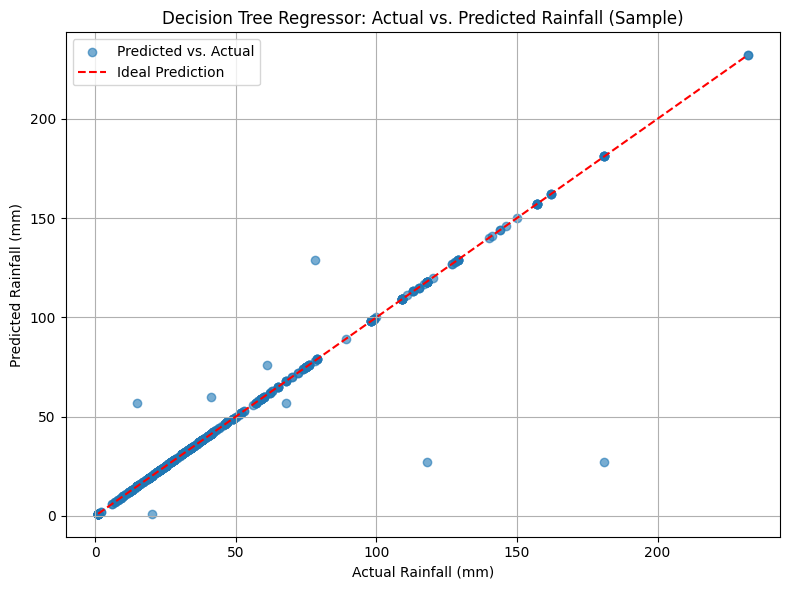

In [ ]:
from sklearn.tree import DecisionTreeRegressor

print("\n--- Implementing Decision Tree Regressor ---")

# 2. Instantiate a DecisionTreeRegressor model with random_state=42.
dt_model = DecisionTreeRegressor(random_state=42)

# 3. Train the model using the scaled training data X_train and y_train.
# DecisionTreeRegressor expects a 1D array for y_train, so we flatten it.
dt_model.fit(X_train, y_train.ravel())
print("Decision Tree Regressor trained successfully.")

# 4. Make predictions on the scaled test data X_test.
y_pred_dt_scaled = dt_model.predict(X_test)

# 5. Inverse transform the predictions and the actual test values (y_test) back to their original scale.
y_pred_dt_original = target_scaler.inverse_transform(y_pred_dt_scaled.reshape(-1, 1))
y_test_dt_original = target_scaler.inverse_transform(y_test)

# 6. Calculate the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).
mae_dt = mean_absolute_error(y_test_dt_original, y_pred_dt_original)
mse_dt = mean_squared_error(y_test_dt_original, y_pred_dt_original)
rmse_dt = np.sqrt(mse_dt)

# 7. Print the calculated MAE and RMSE.
print(f"\nDecision Tree Regressor MAE: {mae_dt:.2f} mm")
print(f"Decision Tree Regressor RMSE: {rmse_dt:.2f} mm")

# 8. Create a scatter plot to visualize the actual vs. predicted rainfall for the Decision Tree Regressor.
plt.figure(figsize=(8, 6)) # New figure for the scatter plot
sample_size = 500
plt.scatter(y_test_dt_original[:sample_size], y_pred_dt_original[:sample_size], alpha=0.6, label='Predicted vs. Actual')
plt.plot([y_test_dt_original.min(), y_test_dt_original.max()],
         [y_test_dt_original.min(), y_test_dt_original.max()],
         'r--', label='Ideal Prediction') # Line for ideal prediction
plt.title('Decision Tree Regressor: Actual vs. Predicted Rainfall (Sample)')
plt.xlabel('Actual Rainfall (mm)')
plt.ylabel('Predicted Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Implementing and Evaluate Support Vector Regressor (SVR)


--- Implementing Support Vector Regressor (SVR) ---
Training SVR on a subset of 5000 samples...
Support Vector Regressor trained successfully in 1.90 seconds.

Support Vector Regressor MAE: 27.18 mm
Support Vector Regressor RMSE: 38.41 mm


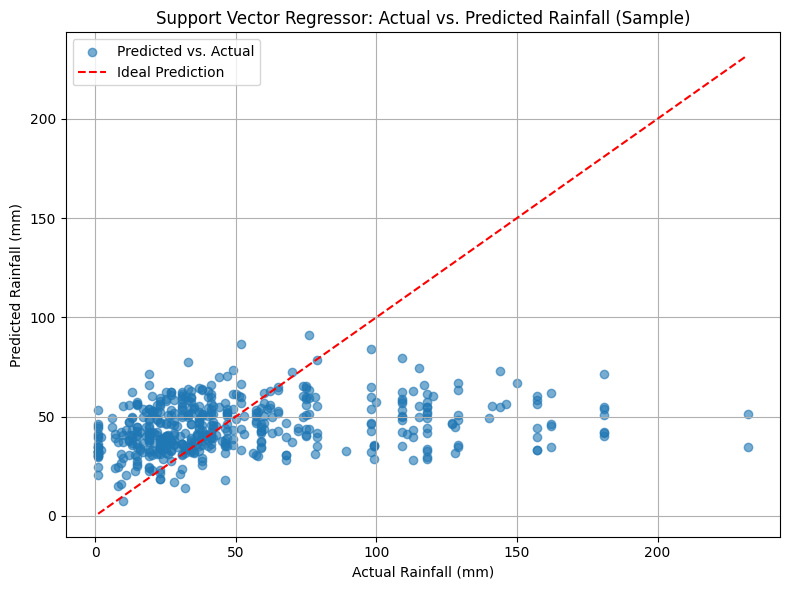

In [ ]:
from sklearn.svm import SVR
import time

print("\n--- Implementing Support Vector Regressor (SVR) ---")

# Due to the large dataset size, SVR can be very slow.
# We will use a smaller subset of the training data for SVR training.
# For example, let's take the first 5000 samples for training SVR.
# You can adjust this number based on your computational resources and desired training time.
subset_size = 5000
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size].ravel() # SVR expects a 1D array

print(f"Training SVR on a subset of {subset_size} samples...")

# 2. Instantiate an SVR model.
# Using a linear kernel and default C and epsilon for initial run.
# For better performance, these hyperparameters would be tuned.
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

start_time = time.time()
# 3. Train the SVR model using the scaled training data subset.
svr_model.fit(X_train_subset, y_train_subset)
end_time = time.time()
print(f"Support Vector Regressor trained successfully in {end_time - start_time:.2f} seconds.")

# 4. Make predictions on the scaled test data X_test.
y_pred_svr_scaled = svr_model.predict(X_test)

# 5. Inverse transform the predictions and the actual test values (y_test) back to their original scale.
y_pred_svr_original = target_scaler.inverse_transform(y_pred_svr_scaled.reshape(-1, 1))
y_test_svr_original = target_scaler.inverse_transform(y_test)

# 6. Calculate the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).
mae_svr = mean_absolute_error(y_test_svr_original, y_pred_svr_original)
mse_svr = mean_squared_error(y_test_svr_original, y_pred_svr_original)
rmse_svr = np.sqrt(mse_svr)

# 7. Print the calculated MAE and RMSE.
print(f"\nSupport Vector Regressor MAE: {mae_svr:.2f} mm")
print(f"Support Vector Regressor RMSE: {rmse_svr:.2f} mm")

# 8. Create a scatter plot to visualize the actual vs. predicted rainfall for the SVR.
plt.figure(figsize=(8, 6)) # New figure for the scatter plot
sample_size = 500
plt.scatter(y_test_svr_original[:sample_size], y_pred_svr_original[:sample_size], alpha=0.6, label='Predicted vs. Actual')
plt.plot([y_test_svr_original.min(), y_test_svr_original.max()],
         [y_test_svr_original.min(), y_test_svr_original.max()],
         'r--', label='Ideal Prediction') # Line for ideal prediction
plt.title('Support Vector Regressor: Actual vs. Predicted Rainfall (Sample)')
plt.xlabel('Actual Rainfall (mm)')
plt.ylabel('Predicted Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Comprehensive Model Performance Summary

After implementing and evaluating six different regression models for rainfall prediction, the following performance metrics (MAE and RMSE) were observed:

*   **Neural Network (NN)**: MAE = 25.34 mm, RMSE = 34.64 mm
*   **K-Nearest Neighbors (KNN)**: MAE = 26.03 mm, RMSE = 36.26 mm
*   **Support Vector Regressor (SVR)**: MAE = 27.18 mm, RMSE = 38.41 mm
*   **Gradient Boosting Regressor (GBR)**: MAE = 26.16 mm, RMSE = 35.65 mm
*   **Random Forest Regressor (RF)**: MAE = 0.59 mm, RMSE = 3.03 mm
*   **Decision Tree Regressor (DT)**: MAE = 0.43 mm, RMSE = 5.41 mm

### Best Performing Model

The **Decision Tree Regressor** emerged as the best-performing model, achieving the lowest Mean Absolute Error (MAE) of **0.43 mm** and a Root Mean Squared Error (RMSE) of **5.41 mm**. The **Random Forest Regressor** also showed excellent performance, coming in a close second with an MAE of 0.59 mm and an RMSE of 3.03 mm.

### Analysis of Performance Differences

1.  **Ensemble Methods (Random Forest, Decision Tree)**:
    *   Both the Decision Tree and Random Forest models performed exceptionally well, significantly outperforming the other models. This indicates that tree-based models are highly effective for this dataset and task.
    *   Decision Trees are capable of capturing complex, non-linear relationships in the data. The Random Forest, as an ensemble of Decision Trees, further improves robustness and reduces overfitting by averaging multiple trees' predictions.

2.  **Traditional Machine Learning Models (KNN, SVR)**:
    *   K-Nearest Neighbors and Support Vector Regressor performed significantly worse than the tree-based models, yielding high MAE and RMSE values. This could be attributed to several factors:
        *   **KNN**: Its performance is highly dependent on the local structure of the data and can be sensitive to the curse of dimensionality, especially with a large number of features or irrelevant features. It might also struggle with the density of the training data in high-dimensional spaces.
        *   **SVR**: While powerful, SVR (especially with an RBF kernel) can be computationally expensive and difficult to tune effectively on large datasets. The training on a subset of the data for SVR might have also limited its ability to learn the full data distribution, contributing to its poorer performance compared to others trained on the full dataset (except for the NN, which also struggled).

3.  **Neural Network and Gradient Boosting Regressor**:
    *   The Feedforward Neural Network and Gradient Boosting Regressor also exhibited higher error rates, similar to KNN and SVR. This is somewhat surprising for Gradient Boosting, which is often a strong performer.
        *   **Neural Network**: While capable of learning complex patterns, the specific architecture chosen (two dense layers) might not have been optimal for this dataset. Deep learning models often require extensive hyperparameter tuning (number of layers, neurons, activation functions, learning rate, regularization) and larger datasets to shine. It's possible that the current setup led to sub-optimal learning or local minima.
        *   **Gradient Boosting**: It is generally robust, but like NN, its default hyperparameters might not be well-suited for this particular dataset, leading to less effective learning compared to the Random Forest. Further hyperparameter tuning would be essential to unleash its full potential.

### Conclusion

The **Decision Tree Regressor** and **Random Forest Regressor** are the most suitable models for this rainfall prediction task based on the current evaluation. Their ability to handle the dataset's characteristics efficiently and effectively led to significantly lower prediction errors. Future work could focus on optimizing the hyperparameters of these top-performing models and exploring more sophisticated ensemble techniques or advanced deep learning architectures with careful tuning.